## K means clustering
eans Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science. 
K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.
It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

The k-means clustering algorithm mainly performs two tasks:

Determines the best value for K center points or centroids by an iterative process.
Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.
Hence each cluster has datapoints with some commonalities, and it is away from other clusters.

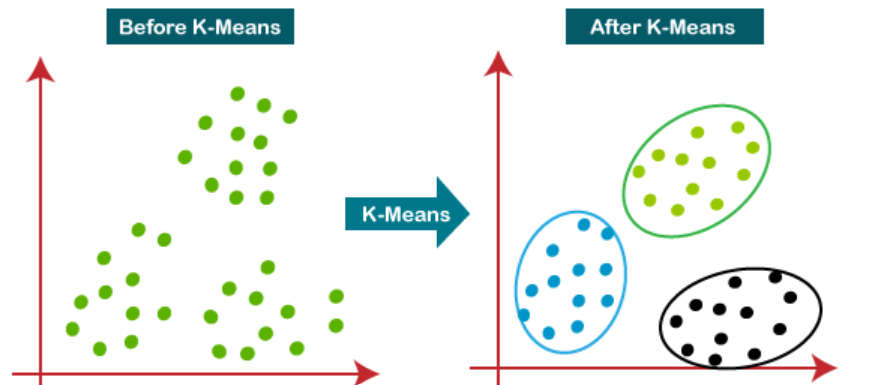

https://machinelearningmastery.com/clustering-algorithms-with-python/

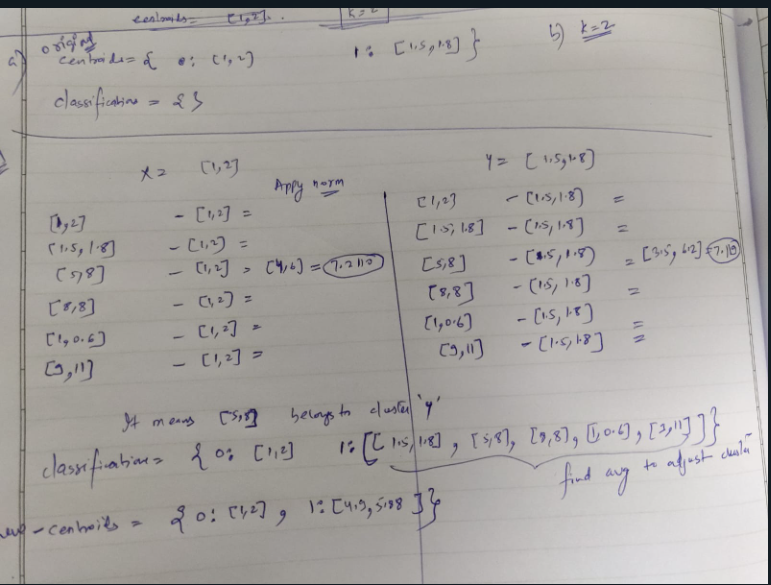

In [ ]:
# np.linalg.norm([4,6])
# np.linalg.norm([3.5,6.2])

In [1]:
class K_Means:
    #     The tol value is our tolerance, which will allow us to say we're optimized if the centroid is not moving more than the tolerance value. The max_iter value is to limit the number of cycles we're willing to run.

    def __init__(self, k=2, tol=0.001, max_iter=20):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            #Assigns starting centroids= first two data samples in our data. 
            # Note- you may shuffle the data to chose ransom points
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            print(self.classifications)
         
            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            
            print(prev_centroids)
            print(self.centroids)
            
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    print()
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


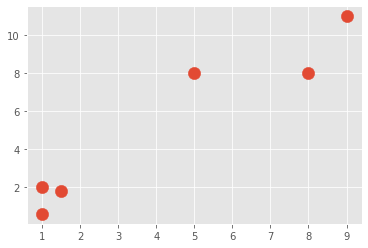

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = 10*["g","r","c","b","k"]

{0: [array([1., 2.])], 1: [array([1.5, 1.8]), array([5., 8.]), array([8., 8.]), array([1. , 0.6]), array([ 9., 11.])]}
{0: array([1., 2.]), 1: array([1.5, 1.8])}
{0: array([1., 2.]), 1: array([4.9 , 5.88])}
453.3333333333334

{0: [array([1., 2.]), array([1.5, 1.8]), array([1. , 0.6])], 1: [array([5., 8.]), array([8., 8.]), array([ 9., 11.])]}
{0: array([1., 2.]), 1: array([4.9 , 5.88])}
{0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}
102.72108843537411

{0: [array([1., 2.]), array([1.5, 1.8]), array([1. , 0.6])], 1: [array([5., 8.]), array([8., 8.]), array([ 9., 11.])]}
{0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}
{0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}


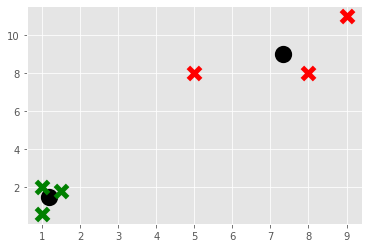

In [3]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

### Document clustering using k means (Movie dataset)

In [16]:
# Step 1: Load the data
import pandas as pd
df = pd.read_csv("D:/Jan July 2023/NLP/Code/K means/Movies_Dataset.csv")
df.head()

,id,title,overview
0,0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,1,Jumanji,When siblings Judy and Peter discover an encha...
2,2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,4,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [5]:
# df['overview'].str.len()

In [17]:
# Step 3: Data preprocessing and feature etraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = df['overview'].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

In [19]:
# features

In [20]:
# train the model using k means clusring algo
k = 20
# n_init” indicates the number of times K-Means would run with different sets of starting points
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=20, n_init=1)

In [8]:
df['cluster'] = model.labels_

In [9]:
df.head(10)

,id,title,overview,cluster
0,0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",3
1,1,Jumanji,When siblings Judy and Peter discover an encha...,19
2,2,Grumpier Old Men,A family wedding reignites the ancient feud be...,18
3,3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3
4,4,Father of the Bride Part II,Just when George Banks has recovered from his ...,5
5,5,Heat,"Obsessive master thief, Neil McCauley leads a ...",3
6,6,Sabrina,An ugly duckling having undergone a remarkable...,3
7,7,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",7
8,8,Sudden Death,International action superstar Jean Claude Van...,3
9,9,GoldenEye,James Bond must unmask the mysterious head of ...,19


In [10]:
clusters = df.groupby('cluster') 

In [11]:
# clusters is a dictionary
clusters.groups

{0: [123, 234, 237, 257, 258, 264, 295, 313, 316, 319, 346, 387, 446, 455, 459, 467, 470, 564, 575, 626, 725, 773, 787, 791, 841, 878, 907, 923, 944, 953, 958, 992, 1001, 1089, 1097, 1161, 1246, 1260, 1303, 1309, 1337, 1351, 1360, 1377, 1427, 1459, 1473, 1477, 1495, 1523, 1530, 1540, 1550, 1572, 1581, 1599, 1620, 1634, 1706, 1732, 1805, 1825, 1836, 1852, 1896, 1918, 1940, 1945, 1946, 1950, 1953, 1979, 1995, 2001, 2059, 2086, 2113, 2142, 2147, 2244, 2247, 2272, 2277, 2279, 2305, 2343, 2396, 2403, 2448, 2475, 2506, 2565, 2575, 2579, 2651, 2661, 2684, 2700, 2827, 2847, ...], 1: [58, 59, 60, 66, 88, 128, 143, 195, 196, 210, 213, 273, 289, 297, 310, 382, 383, 385, 451, 462, 471, 494, 500, 563, 579, 591, 616, 621, 633, 652, 656, 659, 686, 721, 747, 784, 818, 876, 977, 1018, 1021, 1056, 1098, 1103, 1117, 1164, 1177, 1191, 1235, 1251, 1275, 1293, 1315, 1325, 1350, 1367, 1390, 1406, 1426, 1475, 1511, 1534, 1627, 1638, 1641, 1643, 1675, 1710, 1726, 1742, 1771, 1776, 1814, 1888, 1959, 1977, 2040,

In [12]:
# # Let's print the first entries in all the groups formed.
# cluster.first()

In [13]:
# cluster.get_group(2)

In [14]:
for cluster in clusters.groups:
    data = clusters.get_group(cluster)[['title','overview', 'cluster']]
    data.to_csv(r'D:/Jan July 2023/NLP/Code/K means/{name}.csv'.format(name=cluster), index_label='id', encoding='utf-8', index=False) # set index to id

In [15]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 father
 son
 mother
 young
 family
 man
 daughter
 death
 life
 boy
------------
Cluster 1:
 old
 year
 boy
 mother
 new
 man
 life
 girl
 years
 daughter
------------
Cluster 2:
 school
 high
 students
 teacher
 student
 girls
 friends
 new
 love
 girl
------------
Cluster 3:
 man
 new
 young
 love
 wife
 world
 documentary
 time
 finds
 friends
------------
Cluster 4:
 war
 world
 ii
 civil
 american
 soldiers
 german
 soldier
 army
 story
------------
Cluster 5:
 home
 family
 returns
 new
 life
 mother
 wife
 man
 young
 house
------------
Cluster 6:
 film
 documentary
 directed
 director
 movie
 based
 feature
 life
 story
 short
------------
Cluster 7:
 police
 killer
 murder
 detective
 serial
 case
 cop
 man
 officer
 investigation
------------
Cluster 8:
 overview
 available
 movie
 plot
 freaks
 freakishly
 freakish
 freaking
 freaked
 freak
------------
Cluster 9:
 girl
 young
 love
 teenage
 life
 man
 falls
 little
 boy
 new
------------
Cl